In [29]:
import keras
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from train_net import test_augmentation
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Download model using link: https://drive.google.com/open?id=0B3CnabXPXFVNQS1xcFgtd0VyUTA
model = keras.models.load_model('best_model.hdf5')

/home/maciej/.virtualenvs/base/local/lib/python2.7/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
DATA_PATH = '/home/maciej/intel/data/wyciete_z_wiekszych_ostateczne/'
X_train_cut = pd.read_pickle(DATA_PATH + 'X_train_cut')
y_train_cut = pd.read_pickle(DATA_PATH + 'y_train_cut')

In [6]:
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(
    X_train_cut, y_train_cut, test_size=0.25, random_state=123)

In [22]:
def test_augmentation(model, datagen, X, n_iter=50):
    pred = []
    print('Predictions are being computed...')
    for _ in range(n_iter):
        pred.append(model.predict_generator(datagen.flow(X, shuffle=False, batch_size=1),
                                            X.shape[0], pickle_safe=True))
    return np.array(pred).mean(axis=0)

In [23]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2, )
preds = test_augmentation(model, datagen, X_test_train, n_iter=3)

Predictions are being computed...


/home/maciej/.virtualenvs/base/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<keras.pre..., 371, use_multiprocessing=True)`
  


In [25]:
print "Accuracy: {}".format(accuracy_score(y_test_train, np.argmax(preds, axis=1)))
print "Percentage of labels: ", np.unique(y_test_train, return_counts=True)[1]/512.
print "Percentage of preds: ", np.unique(np.argmax(preds, axis=1), return_counts=True)[1]/512.
print "Log loss: {}".format(log_loss(y_test_train, preds))
print "Confusion matrix: "
pd.DataFrame(confusion_matrix(y_test_train, np.argmax(preds, axis=1)), columns=['0', '1', '2'], index=[0, 1, 2])

Accuracy: 0.628032345013
Percentage of labels:  [ 0.125       0.40429688  0.1953125 ]
Percentage of preds:  [ 0.10742188  0.41210938  0.20507812]
Log loss: 0.768569608048
Confusion matrix: 


,0,1,2
0,23,38,3
1,27,144,36
2,5,29,66


[[ 0.09622873  0.31203574  0.5917356 ]] True label:  2


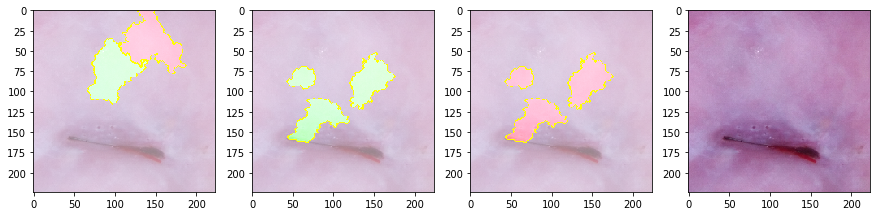

In [30]:
# index of image to display
ex = 15

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X_test_train[ex]/255., classifier_fn=model.predict,
                                        top_labels=3, hide_color=0)

plt.figure(figsize=(15,12))
plt.subplot(141)
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(142)
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.00000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(143)
temp, mask = explanation.get_image_and_mask(2, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.0000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

plt.subplot(144)
plt.imshow(X_test_train[ex]/255.)

print model.predict(X_test_train[ex:ex+1]/255.), "True label: ", y_test_train[ex]

[[ 0.09583392  0.31246954  0.5916965 ]] True label:  1


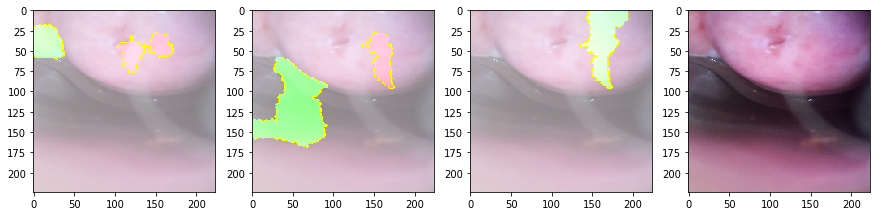

In [31]:
# index of image to display
ex = 2

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X_test_train[ex]/255., classifier_fn=model.predict,
                                        top_labels=3, hide_color=0)

plt.figure(figsize=(15,12))
plt.subplot(141)
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(142)
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.00000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(143)
temp, mask = explanation.get_image_and_mask(2, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.0000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

plt.subplot(144)
plt.imshow(X_test_train[ex]/255.)

print model.predict(X_test_train[ex:ex+1]/255.), "True label: ", y_test_train[ex]

[[ 0.09667534  0.31386644  0.58945823]] True label:  1


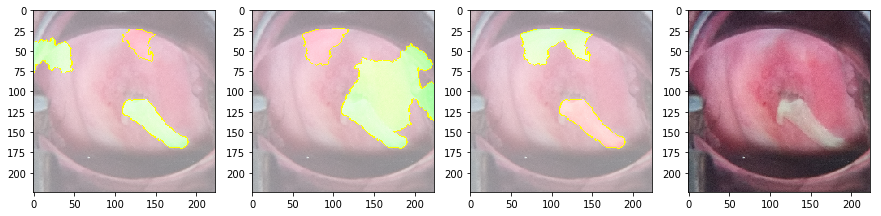

In [32]:
# index of image to display
ex = 32

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X_test_train[ex]/255., classifier_fn=model.predict,
                                        top_labels=3, hide_color=0)

plt.figure(figsize=(15,12))
plt.subplot(141)
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(142)
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.00000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.subplot(143)
temp, mask = explanation.get_image_and_mask(2, positive_only=False, num_features=3, hide_rest=False,
                                           min_weight=0.0000005)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

plt.subplot(144)
plt.imshow(X_test_train[ex]/255.)

print model.predict(X_test_train[ex:ex+1]/255.), "True label: ", y_test_train[ex]